import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [7]:
df.isna().sum()

Category    0
Resume      0
dtype: int64

<Axes: xlabel='count', ylabel='Category'>

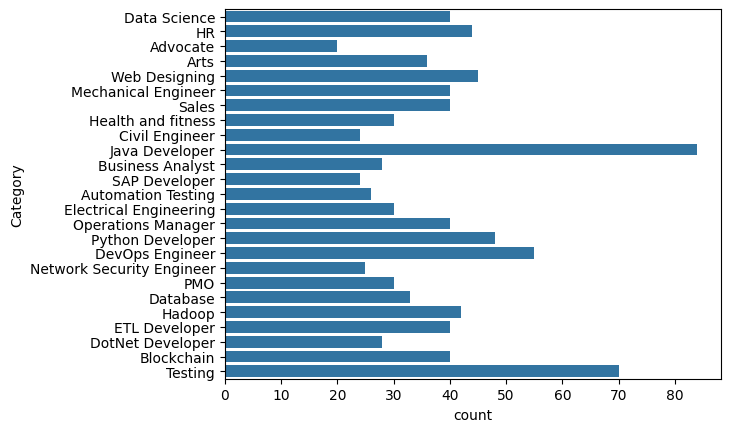

In [8]:
sns.countplot(df['Category'])

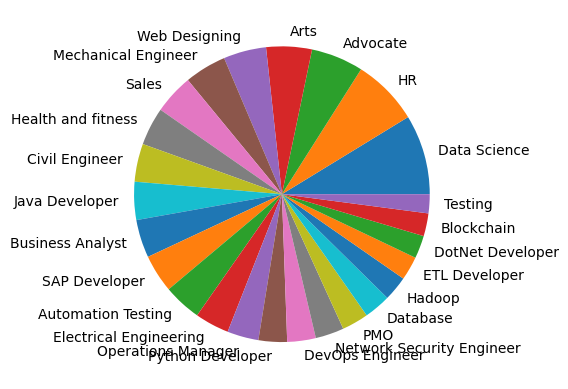

In [9]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()

plt.pie(counts,labels=labels)
plt.show()

Data Cleaning
1.) URL'S
2.) Special characters
3.) Punctuations
4.) Hashtags
5.) Mentions

In [10]:
import re

def clean(text):
    # Remove URLs
    cleantext = re.sub(r"http\S+|www\S+", "", text)

    # Remove mentions
    cleantext = re.sub(r"@\S+", "", cleantext)

    # Remove hashtags
    cleantext = re.sub(r"#\S+", "", cleantext)

    # Remove RT and CC
    cleantext = re.sub(r"\bRT\b|\bCC\b", "", cleantext)

    # Normalize whitespace
    cleantext = re.sub(r"\s+", " ", cleantext)

    # Remove punctuation
    cleantext = re.sub(r"[{}]".format(re.escape("""!<=>{|}[](:;,."')?/$@-+^~_""")), "", cleantext)

    # Remove non-ASCII characters
    cleantext = re.sub(r"[^\x00-\x7f]", "", cleantext)
    
    return cleantext.strip()

In [11]:
text = "#hi my URL is http://url connected @gmail.com "
clean(text)

'my URL is connected'

In [12]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [13]:
df['Resume'] = df['Resume'].apply(lambda x: clean(x))

In [14]:
df['Resume']= df['Resume'].apply(lambda x: x.lower())

In [15]:
df

,Category,Resume
0,Data Science,skills * programming languages python pandas n...
1,Data Science,education details may 2013 to may 2017 be uitr...
2,Data Science,areas of interest deep learning control system...
3,Data Science,skills r python sap hana tableau sap hana...
4,Data Science,education details mca ymcaust faridabad haryan...
...,...,...
957,Testing,computer skills proficient in ms office word ...
958,Testing,willingness to accept the challenges positive...
959,Testing,personal skills quick learner eagerness to l...
960,Testing,computer skills & software knowledge mspower p...


Words to categorial value

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df['Category'] = le.fit_transform(df['Category'])

In [18]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [19]:
"""array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)"""

"""array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])"""

'array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,\n       17, 19,  7, 13, 10,  9,  3, 23])'

Vectorization

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(stop_words='english')

In [22]:
tfidf.fit(df['Resume'])
reqdtext = tfidf.transform(df['Resume'])


In [23]:
df['Resume']

0      skills * programming languages python pandas n...
1      education details may 2013 to may 2017 be uitr...
2      areas of interest deep learning control system...
3      skills  r  python  sap hana  tableau  sap hana...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills  proficient in ms office word ...
958    willingness to accept the challenges  positive...
959    personal skills  quick learner  eagerness to l...
960    computer skills & software knowledge mspower p...
961    skill set os windows xp788110 database mysql s...
Name: Resume, Length: 962, dtype: object

In [24]:
reqdtext[0]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 314 stored elements and shape (1, 7862)>

Spiltting

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reqdtext, df['Category'], test_size=0.3, random_state=42)

In [26]:
X_test.shape
X_train.shape

(673, 7862)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

kn = OneVsRestClassifier(KNeighborsClassifier())
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)

In [28]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23,  2,  3, 18, 14,  1, 12, 13, 22, 12, 11, 23,
       18, 15, 19, 15,  6,  0, 15,  8,  9, 16,  6, 12, 14,  9, 15,  4,  0,
       20, 16,  7,  8, 23

In [29]:
print(accuracy_score(y_test,y_pred))

0.986159169550173


Prediction

In [ ]:
myresume= """"""
 


In [31]:
import pickle

# Save vectorizer
pickle.dump(tfidf, open('tfidf.pkl','wb'))

# Save trained classifier
pickle.dump(kn, open('kn.pkl','wb'))

In [32]:
import pickle

# Save vectorizer
pickle.dump(tfidf, open('tfidf.pkl','wb'))

# Save trained classifier
pickle.dump(kn, open('kn.pkl','wb'))

In [35]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(KNeighborsClassifier()))
])

pipeline.fit(df['Resume'], df['Category'])

# Save pipeline
pickle.dump(pipeline, open('resume_classifier.pkl','wb'))

# Load pipeline
pipeline = pickle.load(open('resume_classifier.pkl','rb'))

# Predict directly
prediction = pipeline.predict([clean(myresume)])[0]
predicted_category = le.inverse_transform([prediction])[0]

print("Predicted Category:", predicted_category)

Predicted Category: Civil Engineer
